In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import os
import matplotlib.patches as mpl_patches

In [2]:
df=pd.read_table('FigS6.csv',sep='\t')
df.head()

,Sample,Soil,B,Ca,Cd,Co,Cu,Fe,K,Li,...,Mn,Mo,Na,Ni,P,Pb,Rb,S,Sr,Zn
0,F13-8,Potting mix,79.558,23047.77,0.104,0.067,9.373,47.541,46152.53,0.837,...,193.845,4.422,430.47,0.035,10688.65,1.178,17.581,10558.57,21.933,88.793
1,F13-8,Potting mix,85.663,22897.15,0.076,0.051,8.998,48.745,42133.05,0.852,...,188.293,4.052,458.13,0.060,10202.11,0.406,17.730,10676.92,26.504,122.128
2,F13-8,Potting mix,77.649,22315.00,0.091,0.048,9.219,46.739,41876.32,0.820,...,211.070,3.671,366.16,0.378,10486.79,0.491,17.183,11281.74,25.658,86.390
3,F13-8,Potting mix,75.188,19829.97,0.242,0.052,10.994,55.619,42053.36,0.717,...,211.565,5.081,313.76,0.049,10998.58,0.408,17.692,12184.59,21.733,92.299
4,F13-8,Potting mix,78.907,19800.27,0.079,0.050,9.632,46.887,44669.82,0.827,...,214.159,5.603,339.87,0.043,10437.10,0.230,18.261,11516.29,23.340,90.400


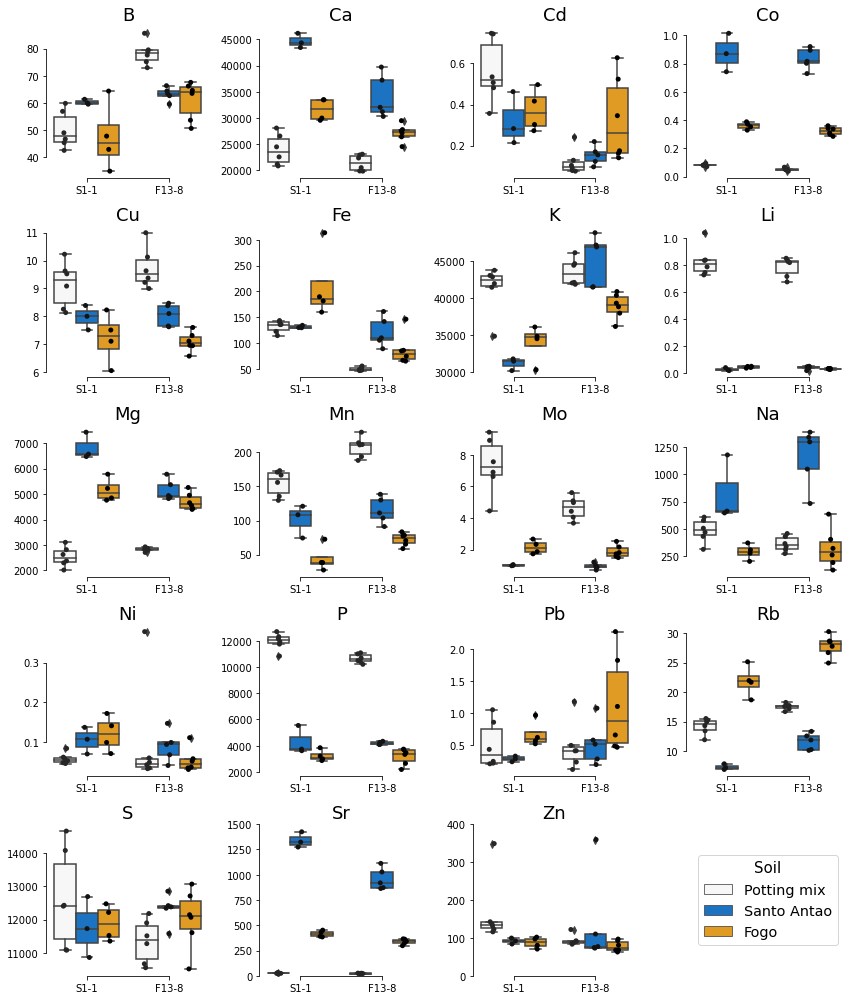

In [8]:
colors=['#f7f7f7','#0075DC','#FFA405']
elements = ['B','Ca','Cd','Co',
            'Cu','Fe','K','Li','Mg',
            'Mn','Mo','Na','Ni','P',
            'Pb','Rb','S','Sr','Zn']
Order=['S1-1','F13-8']
def plots(element,idx1,idx2):
    sns.boxplot(x='Sample', 
                y=element, 
                data=df,
                order=Order,
                hue='Soil',
                hue_order=['Potting mix','SantoAntão (S3)','Fogo (F4)'],
                palette=colors,
                ax=axes[idx1,idx2])
    sns.stripplot(x='Sample', 
                y=element, 
                data=df,
                jitter=True,
                dodge=True,
                order=Order,
                hue_order=['Potting mix','SantoAntão (S3)','Fogo (F4)'],
                color='0',
                hue='Soil',
                ax=axes[idx1,idx2])
    axes[idx1,idx2].set_xlabel('')
    axes[idx1,idx2].set_ylabel('')
    axes[idx1,idx2].set_title(element,fontsize=18)
    
fig,axes = plt.subplots(5,4,sharey=False,figsize=(12,14))
a,b=0,0
for index in range(len(elements)):
    if index % 4 == 0:
        if index == 0:
            plots(elements[index],a,b)
            axes[a,b].get_legend().remove()
            b+=1
        elif index == 16:
            a+=1
            b=0
            plots(elements[index],a,b)
            axes[a,b].get_legend().remove()
            b+=1
        else:
            a+=1
            b=0
            plots(elements[index],a,b)
            axes[a,b].get_legend().remove()
            b+=1
    elif index < 16:
        plots(elements[index],a,b)
        axes[a,b].get_legend().remove()
        b+=1
    elif index == 17:
        plots(elements[index],a,b)
        axes[a,b].set_ylim(0,1500)
        axes[a,b].get_legend().remove()
        b+=1
    elif index == 18:
        plots(elements[index],a,b)
        axes[a,b].set_ylim(0,400)
        legend=axes[a,b].get_legend()
        handles = legend.legendHandles
        axes[a,b+1].legend(handles, ['Potting mix', 'Santo Antao', 'Fogo'], title='Soil',loc='center',
                           fontsize='x-large',title_fontsize=15,frameon=True)
        axes[a,b].get_legend().remove()
        axes[a,b+1].axis('off')
    else:
        plots(isotopes[index],elements[index],a,b)
        axes[a,b].get_legend().remove()
        b+=1
        
sns.despine(trim=True)
plt.tight_layout()
plt.savefig("FigS6.png", format="png",bbox_inches="tight", facecolor="w", dpi=600)